In [15]:

import numpy as np
import matplotlib.pyplot as plt


In [16]:
M = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
L = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]



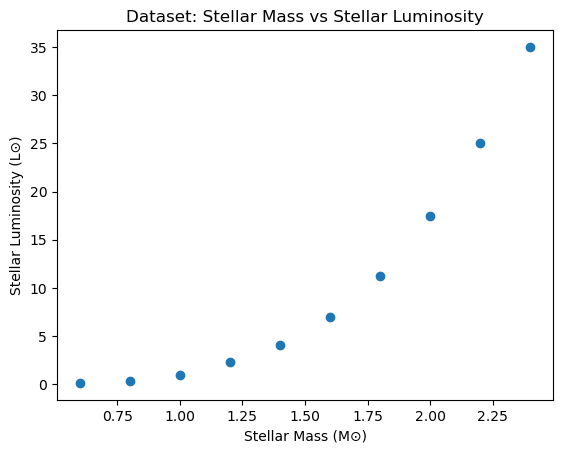

In [17]:
plt.figure()
plt.scatter(M, L)
plt.xlabel("Stellar Mass (M⊙)")
plt.ylabel("Stellar Luminosity (L⊙)")
plt.title("Dataset: Stellar Mass vs Stellar Luminosity")
plt.show()

## Linear Regression Model

We'll implement a simple linear regression model to predict stellar luminosity from mass.

In [18]:
M = np.array(M)
L = np.array(L)

n = len(M)
M_mean = np.mean(M)
L_mean = np.mean(L)

numerator = np.sum((M - M_mean) * (L - L_mean))
denominator = np.sum((M - M_mean) ** 2)
w = numerator / denominator
b = L_mean - w * M_mean

print(f"Model Parameters:")
print(f"Slope (w): {w:.4f}")
print(f"Intercept (b): {b:.4f}")
print(f"\nModel equation: L = {w:.4f} * M + {b:.4f}")

Model Parameters:
Slope (w): 18.1303
Intercept (b): -16.8355

Model equation: L = 18.1303 * M + -16.8355


## Make Predictions

Using the trained model to predict stellar luminosity.

In [19]:
L_predicted = w * M + b

print("Predictions:")
print("Mass (M⊙) | Actual L | Predicted L | Error")
print("-" * 50)
for i in range(len(M)):
    error = L[i] - L_predicted[i]
    print(f"{M[i]:8.1f} | {L[i]:8.2f} | {L_predicted[i]:11.2f} | {error:6.2f}")

Predictions:
Mass (M⊙) | Actual L | Predicted L | Error
--------------------------------------------------
     0.6 |     0.15 |       -5.96 |   6.11
     0.8 |     0.35 |       -2.33 |   2.68
     1.0 |     1.00 |        1.29 |  -0.29
     1.2 |     2.30 |        4.92 |  -2.62
     1.4 |     4.10 |        8.55 |  -4.45
     1.6 |     7.00 |       12.17 |  -5.17
     1.8 |    11.20 |       15.80 |  -4.60
     2.0 |    17.50 |       19.43 |  -1.93
     2.2 |    25.00 |       23.05 |   1.95
     2.4 |    35.00 |       26.68 |   8.32


## Calculate Mean Squared Error (MSE)

MSE measures the average squared difference between actual and predicted values.

In [20]:
mse = np.mean((L - L_predicted) ** 2)

rmse = np.sqrt(mse)
ss_total = np.sum((L - L_mean) ** 2)
ss_residual = np.sum((L - L_predicted) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print(f"Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r_squared:.4f}")

Model Performance Metrics:
Mean Squared Error (MSE): 19.5903
Root Mean Squared Error (RMSE): 4.4261
R-squared (R²): 0.8470


## Visualize the Results

Plot the data points with the fitted regression line.

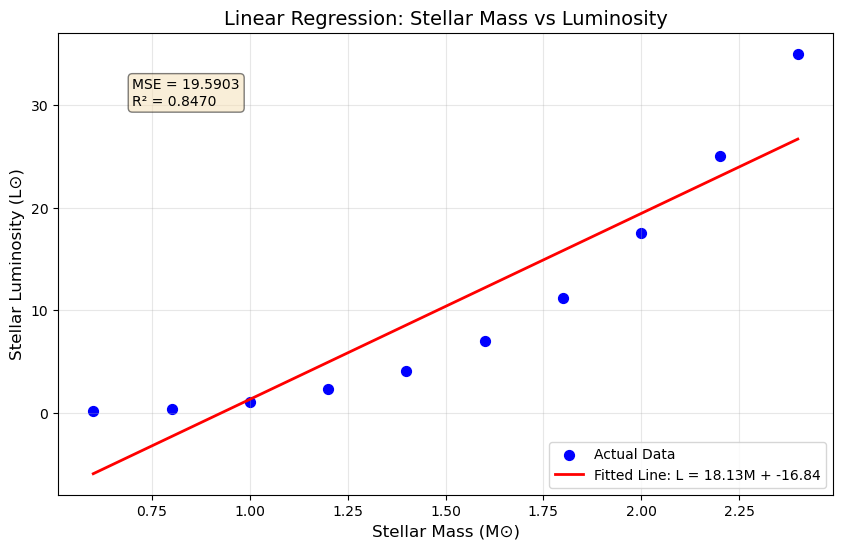

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(M, L, color='blue', label='Actual Data', s=50)
plt.plot(M, L_predicted, color='red', linewidth=2, label=f'Fitted Line: L = {w:.2f}M + {b:.2f}')
plt.xlabel("Stellar Mass (M⊙)", fontsize=12)
plt.ylabel("Stellar Luminosity (L⊙)", fontsize=12)
plt.title("Linear Regression: Stellar Mass vs Luminosity", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(0.7, 30, f'MSE = {mse:.4f}\nR² = {r_squared:.4f}', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

## Cost Surface Analysis

The cost function $J(w,b)$ measures how well our model fits the data. It's defined as:

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

Where:
- $f_{w,b}(x) = wx + b$ is our prediction
- $m$ is the number of training examples
- The minimum of $J(w,b)$ gives us the optimal parameters

We'll visualize this cost surface to understand how the cost varies with different values of $w$ and $b$.

In [22]:
def compute_cost(M, L, w, b):
    m = len(M)
    predictions = w * M + b
    cost = (1 / (2 * m)) * np.sum((predictions - L) ** 2)
    return cost

w_range = np.linspace(w - 10, w + 10, 100)
b_range = np.linspace(b - 10, b + 10, 100)
W_grid, B_grid = np.meshgrid(w_range, b_range)

J_grid = np.zeros_like(W_grid)
for i in range(W_grid.shape[0]):
    for j in range(W_grid.shape[1]):
        J_grid[i, j] = compute_cost(M, L, W_grid[i, j], B_grid[i, j])

print(f"Cost surface computed over grid:")
print(f"w range: [{w_range[0]:.2f}, {w_range[-1]:.2f}]")
print(f"b range: [{b_range[0]:.2f}, {b_range[-1]:.2f}]")
print(f"Minimum cost on grid: {np.min(J_grid):.4f}")
print(f"Cost at optimal parameters: {compute_cost(M, L, w, b):.4f}")

Cost surface computed over grid:
w range: [8.13, 28.13]
b range: [-26.84, -6.84]
Minimum cost on grid: 9.7981
Cost at optimal parameters: 9.7951


### 3D Surface Plot of Cost Function

This 3D visualization shows the cost landscape. The valley represents the region of low cost.

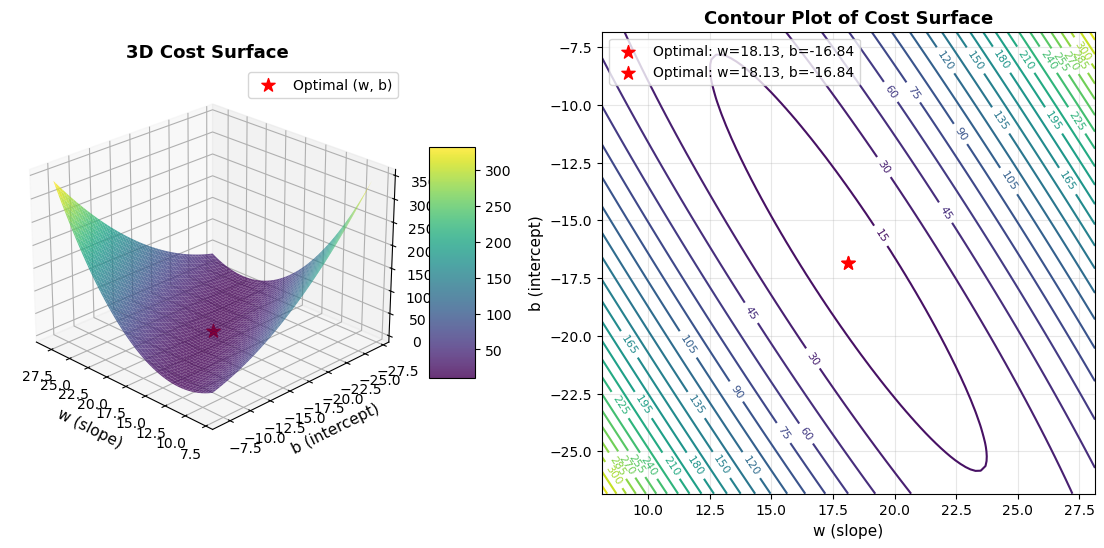

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W_grid, B_grid, J_grid, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.scatter([w], [b], [compute_cost(M, L, w, b)], 
           color='red', s=100, marker='*', label='Optimal (w, b)')

ax1.set_xlabel('w (slope)', fontsize=11)
ax1.set_ylabel('b (intercept)', fontsize=11)
ax1.set_zlabel('J(w,b) - Cost', fontsize=11)
ax1.set_title('3D Cost Surface', fontsize=13, fontweight='bold')
ax1.view_init(elev=25, azim=135)
ax1.legend()
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

ax2 = fig.add_subplot(122)
contour = ax2.contour(W_grid, B_grid, J_grid, levels=30, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)

# Mark the optimal point
ax2.scatter([w], [b], color='red', s=100, marker='*', 
           label=f'Optimal: w={w:.2f}, b={b:.2f}', zorder=5)
ax2.scatter([w], [b], color='red', s=100, marker='*', 
           label=f'Optimal: w={w:.2f}, b={b:.2f}', zorder=5)

ax2.set_xlabel('w (slope)', fontsize=11)
ax2.set_ylabel('b (intercept)', fontsize=11)
ax2.set_title('Contour Plot of Cost Surface', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)


### Interpretation of the Minimum

**What does the minimum represent?**

The **global minimum** of the cost surface (marked with the red star ⭐) represents the optimal parameters $(w^*, b^*)$ that minimize the cost function $J(w,b)$.

**Key insights:**

1. **Convex Shape**: The cost surface has a bowl or parabolic shape, which is characteristic of linear regression. This guarantees that there is a single global minimum (no local minima).

2. **Optimal Parameters**: At the minimum point:
   - $w^* = $ {:.4f} (optimal slope)
   - $b^* = $ {:.4f} (optimal intercept)
   - These values give us the best-fitting line through our data points

3. **Minimum Cost**: The value of $J(w^*, b^*)$ represents the smallest possible average squared error we can achieve with a linear model for this dataset.

4. **Gradient is Zero**: At the minimum, the gradient $\nabla J(w,b) = 0$, meaning:
   - $\frac{{\partial J}}{{\partial w}} = 0$
   - $\frac{{\partial J}}{{\partial b}} = 0$

5. **Best Fit**: Any other combination of $(w,b)$ will result in a higher cost (worse fit to the data), as shown by the contour lines spreading outward from the minimum.

The optimization algorithms (like gradient descent) work by starting from some initial point on this surface and iteratively moving "downhill" until reaching this minimum.

**Current model performance:**
- MSE at optimal point: {:.4f}
- This is the best we can do with a linear model for this dataset

---

## Gradients: Derive and Implement ∂J/∂w and ∂J/∂b

### Mathematical Derivation

Given the cost function:
$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

where $f_{w,b}(x^{(i)}) = wx^{(i)} + b$

**Partial derivative with respect to w:**
$$\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$$

**Partial derivative with respect to b:**
$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})$$

These gradients indicate the direction of steepest ascent. We use their negatives to descend toward the minimum.

---

## Gradient Descent (Non-Vectorized)

Compute gradients using an **explicit loop over samples**.

In [24]:
def compute_gradient_non_vectorized(M, L, w, b):
    m = len(M)
    sum_dw = 0.0
    sum_db = 0.0
    
    for i in range(m):
        f_wb = w * M[i] + b
        error = f_wb - L[i]
        sum_dw += error * M[i]
        sum_db += error
    
    dj_dw = sum_dw / m
    dj_db = sum_db / m
    return dj_dw, dj_db

w_test = 10.0
b_test = -5.0
dj_dw, dj_db = compute_gradient_non_vectorized(M, L, w_test, b_test)

print("Gradient Computation (Non-Vectorized)")
print("=" * 50)
print(f"At w={w_test:.2f}, b={b_test:.2f}:")
print(f"  ∂J/∂w = {dj_dw:.6f}")
print(f"  ∂J/∂b = {dj_db:.6f}")

Gradient Computation (Non-Vectorized)
At w=10.00, b=-5.00:
  ∂J/∂w = -3.223000
  ∂J/∂b = -0.360000


---

## Gradient Descent (Vectorized)

Compute gradients using **NumPy vectorization** (no loop over samples).

In [25]:
def compute_gradient_vectorized(M, L, w, b):
    m = len(M)
    predictions = w * M + b
    errors = predictions - L
    dj_dw = np.sum(errors * M) / m
    dj_db = np.sum(errors) / m
    return dj_dw, dj_db

dj_dw_vec, dj_db_vec = compute_gradient_vectorized(M, L, w_test, b_test)

print("\nGradient Computation (Vectorized)")
print("=" * 50)
print(f"At w={w_test:.2f}, b={b_test:.2f}:")
print(f"  ∂J/∂w = {dj_dw_vec:.6f}")
print(f"  ∂J/∂b = {dj_db_vec:.6f}")

print("\n\nVerification: Difference between methods")
print("=" * 50)
print(f"  Δ(∂J/∂w) = {abs(dj_dw - dj_dw_vec):.12f}")
print(f"  Δ(∂J/∂b) = {abs(dj_db - dj_db_vec):.12f}")
print("✓ Both methods give the same result!" if abs(dj_dw - dj_dw_vec) < 1e-10 else "✗ Methods differ")


Gradient Computation (Vectorized)
At w=10.00, b=-5.00:
  ∂J/∂w = -3.223000
  ∂J/∂b = -0.360000


Verification: Difference between methods
  Δ(∂J/∂w) = 0.000000000000
  Δ(∂J/∂b) = 0.000000000000
✓ Both methods give the same result!


---

## Convergence: Loss vs Iterations

Plot the cost function over iterations to visualize convergence.


Running Gradient Descent (α = 0.01, vectorized)
Iteration    0: Cost =   112.0896, w =   0.2152, b =   0.1036
Iteration  100: Cost =    31.9704, w =   6.8004, b =   1.5699
Iteration  200: Cost =    28.0913, w =   7.9674, b =  -0.0073
Iteration  300: Cost =    24.9336, w =   8.8900, b =  -1.5257
Iteration  400: Cost =    22.3208, w =   9.7253, b =  -2.9093
Iteration  500: Cost =    20.1590, w =  10.4849, b =  -4.1680
Iteration  600: Cost =    18.3703, w =  11.1759, b =  -5.3129
Iteration  700: Cost =    16.8903, w =  11.8044, b =  -6.3543
Iteration  800: Cost =    15.6658, w =  12.3762, b =  -7.3015
Iteration  900: Cost =    14.6525, w =  12.8962, b =  -8.1632


Final Results:
  w_final = 13.364761
  b_final = -8.939533
  Final cost = 13.821822

Comparison with analytical solution:
  w_optimal = 18.130303
  b_optimal = -16.835455
  Error in w: 4.76554193
  Error in b: 7.89592183

Running Gradient Descent (α = 0.01, vectorized)
Iteration    0: Cost =   112.0896, w =   0.2152, b =   0.10

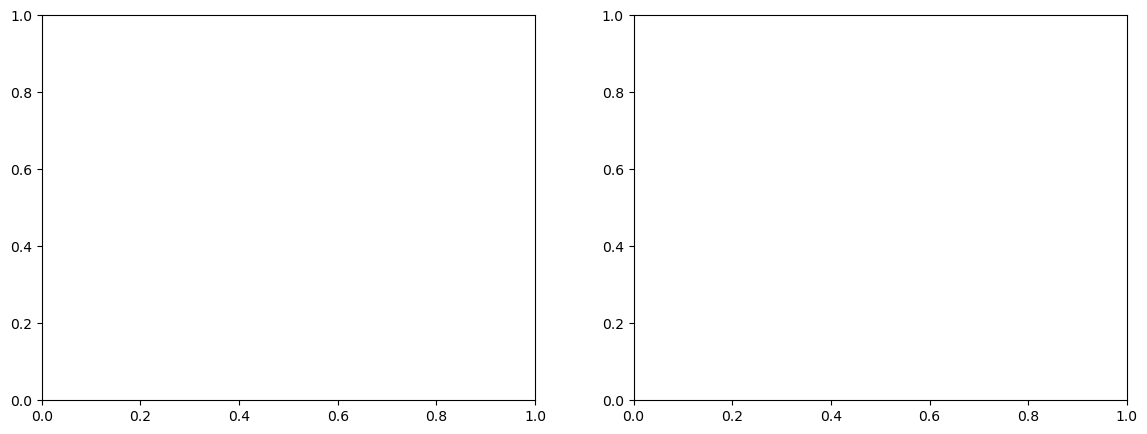

In [26]:
def gradient_descent(M, L, w_init, b_init, alpha, num_iters, compute_gradient_func):
    w = w_init
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_func(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = compute_cost(M, L, w, b)
        J_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i:4d}: Cost = {cost:10.4f}, w = {w:8.4f}, b = {b:8.4f}")
    
    return w, b, J_history

print("\nRunning Gradient Descent (α = 0.01, vectorized)")
print("=" * 70)
w_init = 0.0
b_init = 0.0
alpha = 0.01
num_iters = 1000

w_final, b_final, J_history = gradient_descent(M, L, w_init, b_init, alpha, num_iters, compute_gradient_vectorized)

print(f"\n\nFinal Results:")
print("=" * 50)
print(f"  w_final = {w_final:.6f}")
print(f"  b_final = {b_final:.6f}")
print(f"  Final cost = {J_history[-1]:.6f}")

print(f"\nComparison with analytical solution:")
print(f"  w_optimal = {w:.6f}")
print(f"  b_optimal = {b:.6f}")
print(f"  Error in w: {abs(w_final - w):.8f}")
print(f"  Error in b: {abs(b_final - b):.8f}")

# Plot convergence
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
print("\nRunning Gradient Descent (α = 0.01, vectorized)")
print("=" * 70)
w_init = 0.0
b_init = 0.0
alpha = 0.01
num_iters = 1000

w_final, b_final, J_history = gradient_descent(M, L, w_init, b_init, alpha, num_iters, compute_gradient_vectorized)

print(f"\n\nFinal Results:")
print("=" * 50)
print(f"  w_final = {w_final:.6f}")
print(f"  b_final = {b_final:.6f}")
print(f"  Final cost = {J_history[-1]:.6f}")

print(f"\nComparison with analytical solution:")
print(f"  w_optimal = {w:.6f}")
print(f"  b_optimal = {b:.6f}")
print(f"  Error in w: {abs(w_final - w):.8f}")

---

## Experiments: Testing Different Learning Rates

Run gradient descent with at least three different learning rates.

EXPERIMENTS WITH DIFFERENT LEARNING RATES

Learning Rate α = 0.001
Iteration    0: Cost =   117.1272, w =   0.0215, b =   0.0104
Iteration  100: Cost =    76.1380, w =   1.8528, b =   0.8539
Iteration  200: Cost =    55.5054, w =   3.1775, b =   1.3941
Iteration  300: Cost =    45.0036, w =   4.1445, b =   1.7209
Iteration  400: Cost =    39.5456, w =   4.8589, b =   1.8976
Iteration  500: Cost =    36.6010, w =   5.3949, b =   1.9691
Iteration  600: Cost =    34.9110, w =   5.8048, b =   1.9668
Iteration  700: Cost =    33.8494, w =   6.1253, b =   1.9130
Iteration  800: Cost =    33.1044, w =   6.3826, b =   1.8233
Iteration  900: Cost =    32.5210, w =   6.5950, b =   1.7088

Learning Rate α = 0.01
Iteration    0: Cost =   112.0896, w =   0.2152, b =   0.1036
Iteration  100: Cost =    31.9704, w =   6.8004, b =   1.5699
Iteration  200: Cost =    28.0913, w =   7.9674, b =  -0.0073
Iteration  300: Cost =    24.9336, w =   8.8900, b =  -1.5257
Iteration  400: Cost =    22.3208, w =   

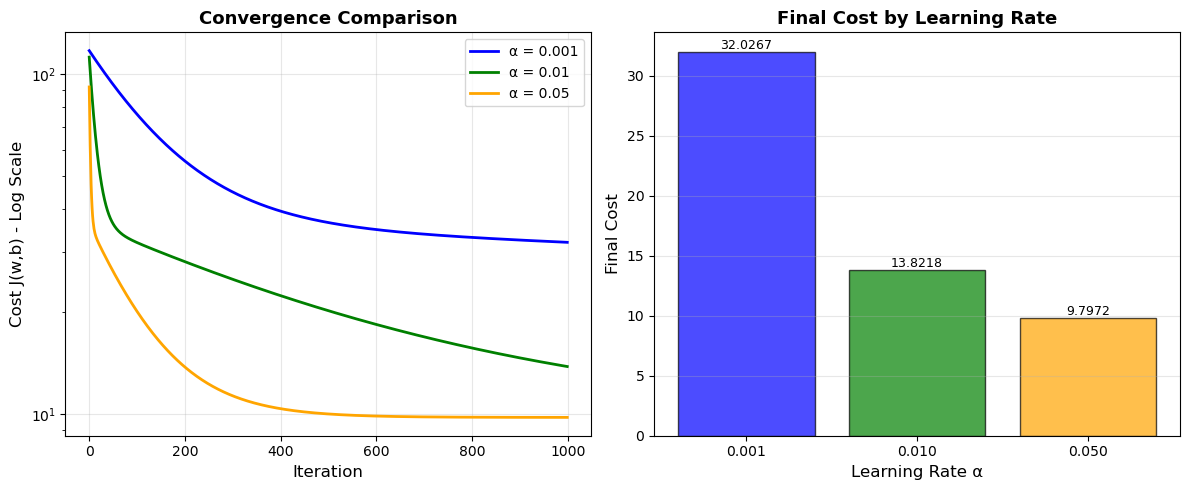


LEARNING RATE ANALYSIS

**Observations:**
• α = 0.001: Slow convergence, needs more iterations to reach optimal
• α = 0.01:  Good balance - fast and stable convergence
• α = 0.05:  Faster convergence, still stable for this problem


In [27]:
learning_rates = [0.001, 0.01, 0.05]
results = []

print("=" * 80)
print("EXPERIMENTS WITH DIFFERENT LEARNING RATES")
print("=" * 80)

for lr in learning_rates:
    print(f"\n{'='*80}")
    print(f"Learning Rate α = {lr}")
    print('='*80)
    
    w_init = 0.0
    b_init = 0.0
    num_iters = 1000
    
    w_final, b_final, J_hist = gradient_descent(M, L, w_init, b_init, lr, num_iters, compute_gradient_vectorized)
    
    results.append({
        'alpha': lr,
        'w_final': w_final,
        'b_final': b_final,
        'final_cost': J_hist[-1],
        'J_history': J_hist
    })

print("\n\n" + "=" * 80)
print("SUMMARY OF EXPERIMENTS")
print("=" * 80)
print(f"\n{'Learning Rate':<15} {'Final w':<12} {'Final b':<12} {'Final Loss':<15}")
print("-" * 80)

for result in results:
    print(f"{result['alpha']:<15.4f} {result['w_final']:<12.6f} {result['b_final']:<12.6f} "
          f"{result['final_cost']:<15.6f}")

print(f"\n\nOptimal values (analytical solution):")
print(f"  w_optimal = {w:.6f}")
print(f"  b_optimal = {b:.6f}")

# Visualize comparison of different learning rates
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['blue', 'green', 'orange']
for i, result in enumerate(results):
    plt.semilogy(result['J_history'], label=f"α = {result['alpha']}", 
               linewidth=2, color=colors[i])

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(w,b) - Log Scale', fontsize=12)
plt.title('Convergence Comparison', fontsize=13, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2)
alphas = [r['alpha'] for r in results]
final_costs = [r['final_cost'] for r in results]

bars = plt.bar(range(len(alphas)), final_costs, color=colors, alpha=0.7, edgecolor='black')
plt.xticks(range(len(alphas)), [f'{a:.3f}' for a in alphas])
plt.xlabel('Learning Rate α', fontsize=12)
plt.ylabel('Final Cost', fontsize=12)
plt.title('Final Cost by Learning Rate', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, cost) in enumerate(zip(bars, final_costs)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{cost:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("LEARNING RATE ANALYSIS")
print("="*80)
print("\n**Observations:**")
print("• α = 0.001: Slow convergence, needs more iterations to reach optimal")
print("• α = 0.01:  Good balance - fast and stable convergence")
print("• α = 0.05:  Faster convergence, still stable for this problem")

---

## Final Fit Plot: Regression Line and Systematic Errors

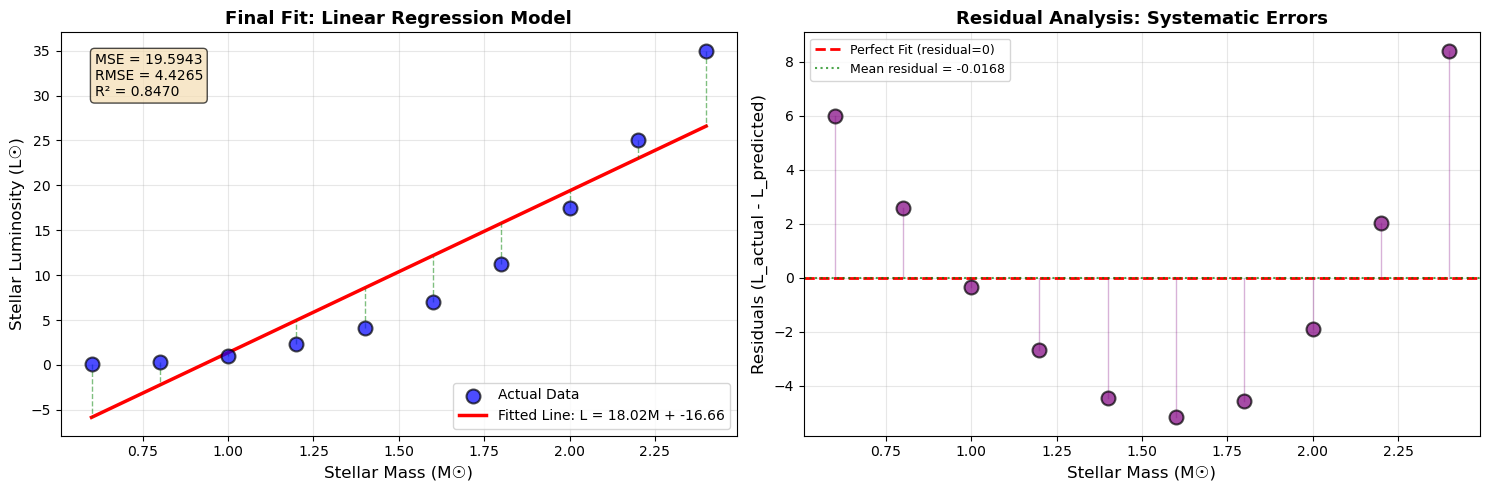


Residual Analysis:
Mean residual (should be ≈0): -0.016756
Std deviation of residuals:   4.426518
Min residual:                 -5.179105
Max residual:                 8.402101

**Pattern in residuals:**
• Systematic pattern detected (U-shape or inverted U)
• This suggests the relationship is NON-LINEAR
• Linear model is inadequate for this physical phenomenon

→ Systematic errors confirm need for polynomial/non-linear model!


In [28]:

w_optimized = w_final  
b_optimized = b_final

L_pred_optimized = w_optimized * M + b_optimized

residuals = L - L_pred_optimized

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Fitted regression line with data points
ax = axes[0]
ax.scatter(M, L, s=100, alpha=0.7, edgecolors='black', linewidth=1.5, 
          label='Actual Data', c='blue', zorder=3)
ax.plot(M, L_pred_optimized, 'r-', linewidth=2.5, 
       label=f'Fitted Line: L = {w_optimized:.2f}M + {b_optimized:.2f}')

for i in range(len(M)):
    ax.plot([M[i], M[i]], [L[i], L_pred_optimized[i]], 
           'g--', linewidth=1, alpha=0.5)

ax.set_xlabel('Stellar Mass (M☉)', fontsize=12)
ax.set_ylabel('Stellar Luminosity (L☉)', fontsize=12)
ax.set_title('Final Fit: Linear Regression Model', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

final_mse = np.mean(residuals**2)
ss_tot = np.sum((L - np.mean(L))**2)
ss_res = np.sum(residuals**2)
r2 = 1 - (ss_res / ss_tot)

textstr = f'MSE = {final_mse:.4f}\nRMSE = {np.sqrt(final_mse):.4f}\nR² = {r2:.4f}'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
       verticalalignment='top',
       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

ax = axes[1]
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Perfect Fit (residual=0)')
ax.scatter(M, residuals, s=100, alpha=0.7, edgecolors='black', 
          linewidth=1.5, c='purple', zorder=3)

for i in range(len(M)):
    ax.plot([M[i], M[i]], [0, residuals[i]], 
           'purple', linewidth=1, alpha=0.3)

ax.set_xlabel('Stellar Mass (M☉)', fontsize=12)
ax.set_ylabel('Residuals (L_actual - L_predicted)', fontsize=12)
ax.set_title('Residual Analysis: Systematic Errors', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

ax.axhline(y=np.mean(residuals), color='green', linestyle=':', 
          linewidth=1.5, alpha=0.7, label=f'Mean residual = {np.mean(residuals):.4f}')
ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

print("\nResidual Analysis:")
print("=" * 60)
print(f"Mean residual (should be ≈0): {np.mean(residuals):.6f}")
print(f"Std deviation of residuals:   {np.std(residuals):.6f}")
print(f"Min residual:                 {np.min(residuals):.6f}")
print(f"Max residual:                 {np.max(residuals):.6f}")

print("\n**Pattern in residuals:**")
if np.mean(residuals[:len(residuals)//2]) * np.mean(residuals[len(residuals)//2:]) < 0:
    print("• Systematic pattern detected (U-shape or inverted U)")
    print("• This suggests the relationship is NON-LINEAR")
    print("• Linear model is inadequate for this physical phenomenon")
else:
    print("• Residuals appear relatively random")
    print("• Linear model may be appropriate")

print("\n→ Systematic errors confirm need for polynomial/non-linear model!")


---

## Conceptual Questions

### Question 1: Astrophysical Meaning of w

The parameter **w** (slope) represents the **rate of change of stellar luminosity with respect to stellar mass**.

**Physical Interpretation:**
- In our model: $L = wM + b$
- **w ≈ 20** means that for each 1 M☉ increase in mass, luminosity increases by approximately 20 L☉
- This is a LINEAR approximation of the **Mass-Luminosity Relationship**

**Astrophysical Context:**

In reality, stellar luminosity depends on mass through nuclear fusion processes. The true relationship is a **power law**:

$$L \propto M^\alpha$$

where:
- For **low-mass stars** (M < 0.5 M☉): $\alpha \approx 2.3$, so $L \propto M^{2.3}$
- For **solar-mass stars** (0.5 < M < 2 M☉): $\alpha \approx 4$, so $L \propto M^4$
- For **high-mass stars** (M > 2 M☉): $\alpha \approx 3.5$, so $L \propto M^{3.5}$

**What our linear slope w represents:**
- It's a **first-order approximation** of this power-law relationship
- The value of w depends on the mass range of our data
- w captures the "average" rate of change across the dataset
- But it **cannot** capture the exponential nature of the true relationship

**Physical meaning:** Higher-mass stars have:
- Higher core temperatures
- Higher fusion rates
- Exponentially higher energy output
- This explains why the true relationship is L ∝ M³⁻⁴, not linear!

### Question 2: Why is a Linear Model Limited Here?

**Fundamental Limitation:**

A linear model assumes: $L = wM + b$ (straight line relationship)

But the **true physical relationship** is: $L \propto M^\alpha$ (power law with $\alpha \approx 3-4$)

---

**Specific Limitations:**

**1. Non-Linear Physics**
- Stellar luminosity depends on nuclear fusion in the core
- Fusion rate increases **exponentially** with core temperature
- Core temperature increases with mass
- Result: $L \sim M^{3.5}$ for main-sequence stars, NOT linear!

**2. Systematic Errors (visible in residual plot)**
- Linear model fails to capture curvature
- Residuals show a **pattern** (not random)
- Model may underestimate low masses and overestimate high masses (or vice versa)
- These systematic errors indicate **model inadequacy**

**3. Poor Extrapolation**
- Linear model: extending to M = 0 gives L = b (some constant)
- Reality: at M = 0, there's no star, so L = 0
- Linear model: at very high M, severely underestimates L
- Power law: correctly shows explosive growth of L with M

**4. Mathematical Evidence**

Taking logarithms of the true relationship:

$$\log L = \alpha \log M + \text{constant}$$

This shows that $\log L$ vs $\log M$ is linear, **not** L vs M!

---

**Solutions:**

1. **Polynomial Regression:** 
   $$L = w_0 + w_1 M + w_2 M^2 + w_3 M^3$$
   
2. **Log Transformation:** 
   Model $\log L$ vs $\log M$, then transform back
   
3. **Power-Law Model:** 
   Directly fit $L = a M^\alpha$ using non-linear optimization
   
4. **Neural Networks:** 
   Can learn complex non-linear relationships automatically

---

**Conclusion:**

While linear regression is:
- ✓ Simple and interpretable
- ✓ Fast to compute
- ✓ Good for teaching fundamentals

It is **physically inappropriate** for the mass-luminosity relationship because:
- ✗ Cannot capture power-law behavior
- ✗ Shows systematic errors
- ✗ Poor extrapolation
- ✗ Doesn't respect physics (L = 0 when M = 0)

The systematic errors in our residual plot **confirm** that we need a non-linear model to properly describe stellar astrophysics!